# Section 0:

__Submission Date:__ 24/11/2024

__Assignment: QPM-2024-2025: Assignment 4__

__SOLUTION__

Replication of Moreira Muir


# Section 1:

In [42]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import ace_tools as tools

# To format numbers in pandas dataframes set up format for entire file
pd.options.display.float_format = '{:,.4f}'.format

ModuleNotFoundError: No module named 'ace_tools'

## Q0.1

Loading the dataset

In [26]:
# Extracting tickers from the Symbol column
data = pd.read_excel('data/QPM-FactorsData-ForAssignment-04.xlsx', index_col=0)
data.index = pd.to_datetime(data.index, format='%Y%m')     
data.head(5)

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
Dates,,,,,,,,,
1967-02-01,0.0078,0.0334,-0.0217,0.0194,-0.0094,0.0356,0.0353,-0.0021,0.0262
1967-03-01,0.0399,0.0163,0.0031,0.0090,-0.0151,0.0142,0.0189,-0.0169,0.0081
1967-04-01,0.0389,0.0062,-0.0264,0.0243,-0.0375,0.0064,0.0110,-0.0295,0.0171
1967-05-01,-0.0433,0.0198,0.0080,-0.0175,0.0161,0.0067,0.0052,0.0247,0.0201
1967-06-01,0.0241,0.0596,0.0096,-0.0064,-0.0239,0.0603,0.0029,-0.0217,-0.0163


## Q0.2 

Moreira Muir buckets -> DMU trecile buckets

In [70]:
realized_variance_12m = data.rolling(6).var()
previous_month_volatility = realized_variance_12m.shift(-1).dropna()

In [71]:
# Calculate quantiles and assign observations to ranges
quantile_ranges = [0, 0.333, 0.6666, 1]
results = {}

for col in previous_month_volatility.columns:
    quantiles = previous_month_volatility[col].quantile(quantile_ranges)
    ranges = []
    for i in range(len(quantile_ranges) - 1):
        # Get observations in the current range
        range_data = previous_month_volatility[(previous_month_volatility[col] > quantiles.iloc[i]) &
                                               (previous_month_volatility[col] <= quantiles.iloc[i + 1])]
        ranges.append(list(range_data.index))
    results[col] = ranges

# Convert the result to a structured DataFrame for presentation
quantile_result_df = pd.DataFrame(results, index=["0-0.33", "0.33-0.66", "0.66-1"])
quantile_result_df

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
0-0.33,"[1967-10-01 00:00:00, 1967-11-01 00:00:00, 196...","[1967-06-01 00:00:00, 1968-10-01 00:00:00, 196...","[1968-12-01 00:00:00, 1969-01-01 00:00:00, 196...","[1967-09-01 00:00:00, 1967-10-01 00:00:00, 196...","[1969-04-01 00:00:00, 1969-05-01 00:00:00, 197...","[1968-10-01 00:00:00, 1968-11-01 00:00:00, 196...","[1967-07-01 00:00:00, 1967-08-01 00:00:00, 196...","[1969-04-01 00:00:00, 1969-05-01 00:00:00, 196...","[1968-11-01 00:00:00, 1968-12-01 00:00:00, 196..."
0.33-0.66,"[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196...","[1967-07-01 00:00:00, 1967-08-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196...","[1968-12-01 00:00:00, 1969-01-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-09-01 00:00:00, 196...","[1968-10-01 00:00:00, 1968-12-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196..."
0.66-1,"[1968-03-01 00:00:00, 1968-04-01 00:00:00, 196...","[1968-01-01 00:00:00, 1968-02-01 00:00:00, 196...","[1967-12-01 00:00:00, 1968-01-01 00:00:00, 196...","[1967-12-01 00:00:00, 1968-01-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196...","[1968-02-01 00:00:00, 1968-03-01 00:00:00, 196...","[1968-04-01 00:00:00, 1968-05-01 00:00:00, 196...","[1967-06-01 00:00:00, 1967-07-01 00:00:00, 196...","[1968-02-01 00:00:00, 1968-03-01 00:00:00, 196..."


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Example definition of data and quantile_result_df (replace with actual data)
# data = pd.DataFrame(...)  # Your main dataset
# quantile_result_df = pd.DataFrame(...)  # DataFrame with date ranges for each quantile
# realized_variance_12m = pd.DataFrame(...)  # Variance dataset

def generate_bucket_charts(data, quantile_result_df, realized_variance_12m):
    """
    Generate bar charts for each column in the dataset.
    Creates 3 charts for each column: Average Returns, Average Volatility, and Average Return-to-Volatility.
    
    Parameters:
    - data: DataFrame containing the main data (e.g., returns)
    - quantile_result_df: DataFrame with date ranges for each quantile bucket
    - realized_variance_12m: DataFrame with realized volatility values
    
    Output:
    - Bar charts for each column in `data` showing the average metrics for each bucket.
    """
    # Iterate over each column in the main dataset
    columns = data.columns  # Ensure `data` is a DataFrame
    for col in columns:
        # Initialize a dictionary to store average metrics for the current column
        bucket_averages = {
            "Bucket": [0, 1, 2],  # Quantile bucket indices
            "Average Returns": [],
            "Average Volatility": [],
            "Average Return-to-Volatility": []
        }
        
        # Loop over all 5 buckets (0-4)
        for i in range(3):
            # Get the dates corresponding to the current bucket
            bucket_dates = quantile_result_df.iloc[i, 0]  # Adjust if quantile_result_df structure differs
            
            # Filter the data and variance for the current column and bucket dates
            bucket_returns = data.loc[bucket_dates, col]  # Returns for the bucket
            bucket_volatility = realized_variance_12m.loc[bucket_dates, 'Market']  # Volatility for the bucket
            
            # Calculate the return-to-volatility ratio for the current bucket
            bucket_return_to_vol = bucket_returns / bucket_volatility
            
            # Compute and store the averages for the current bucket
            bucket_averages["Average Returns"].append(bucket_returns.mean())
            bucket_averages["Average Volatility"].append(bucket_volatility.mean())
            bucket_averages["Average Return-to-Volatility"].append(bucket_return_to_vol.mean())
        
        # Plot bar chart for Average Returns
        '''
        plt.figure(figsize=(8, 4))
        plt.bar(bucket_averages["Bucket"], bucket_averages["Average Returns"], alpha=0.7)
        plt.title(f"Average Returns by Bucket ({col})")  # Chart title includes column name
        plt.xlabel("Bucket")  # X-axis label
        plt.ylabel("Average Returns")  # Y-axis label
        plt.show()

        # Plot bar chart for Average Volatility
        plt.figure(figsize=(8, 4))
        plt.bar(bucket_averages["Bucket"], bucket_averages["Average Volatility"], alpha=0.7)
        plt.title(f"Average Volatility by Bucket ({col})")  # Chart title includes column name
        plt.xlabel("Bucket")  # X-axis label
        plt.ylabel("Average Volatility")  # Y-axis label
        plt.show()
        '''
        # Plot bar chart for Average Return-to-Volatility
        plt.figure(figsize=(8, 4))
        plt.bar(bucket_averages["Bucket"], bucket_averages["Average Return-to-Volatility"], alpha=0.7)
        plt.title(f"Average Return-to-Volatility by Bucket ({col})")  # Chart title includes column name
        plt.xlabel("Bucket")  # X-axis label
        plt.ylabel("Average Return-to-Volatility")  # Y-axis label
        plt.show()

# Call the function with properly defined DataFrames
# generate_bucket_charts(data, quantile_result_df, realized_variance_12m)


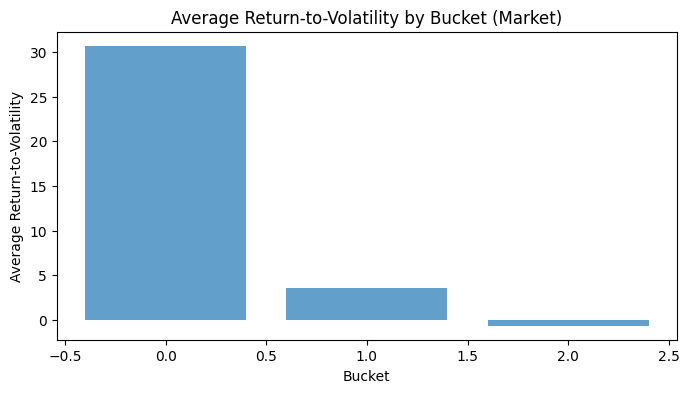

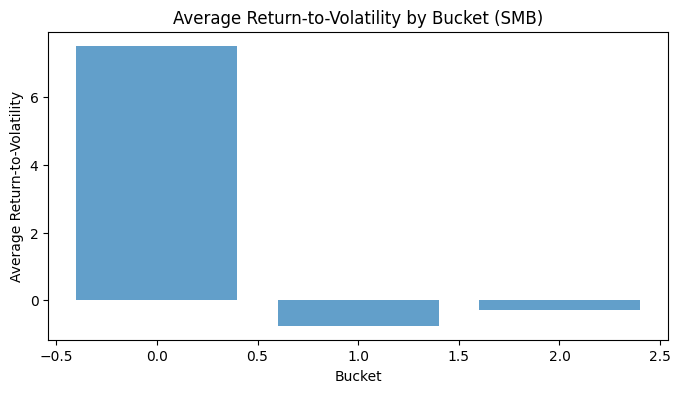

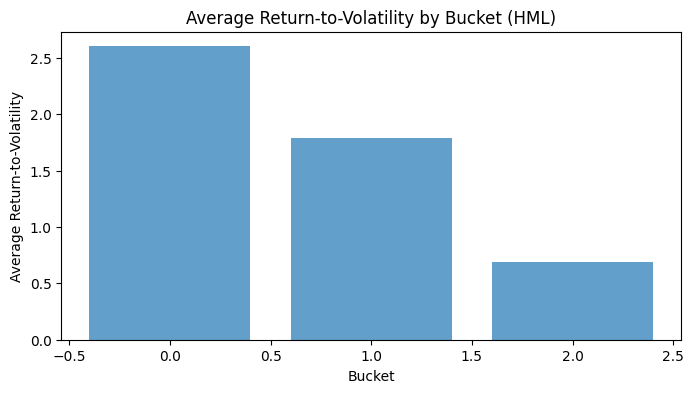

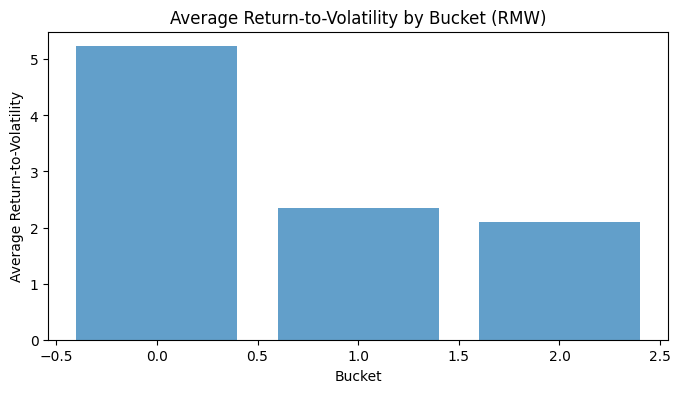

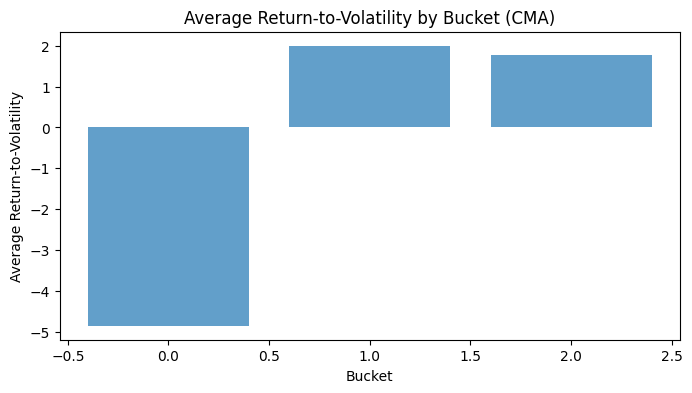

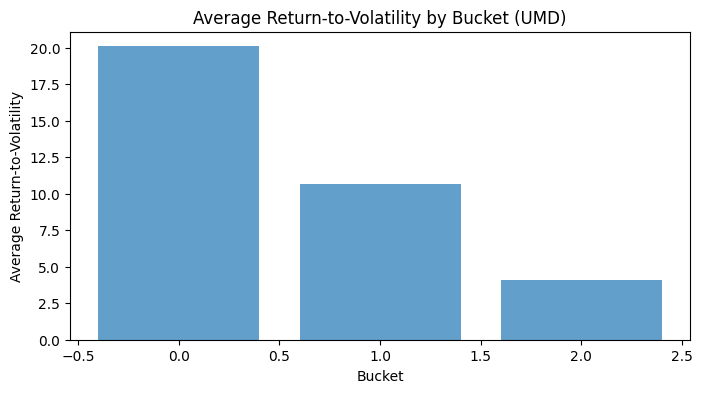

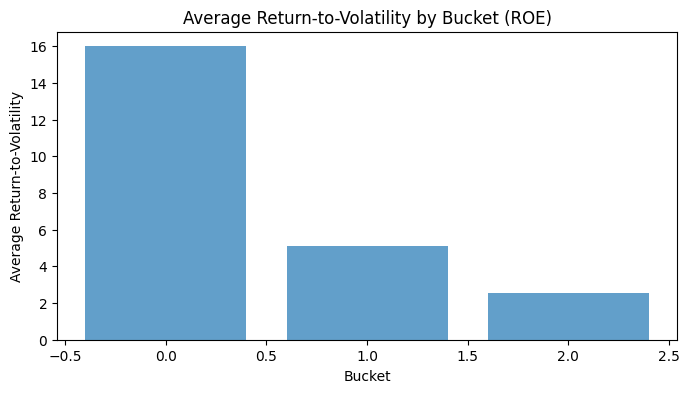

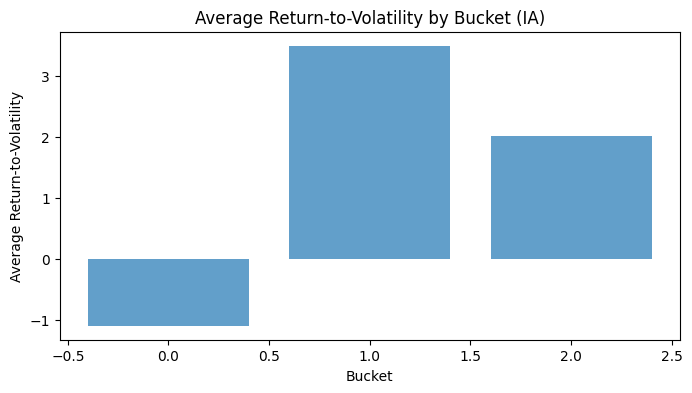

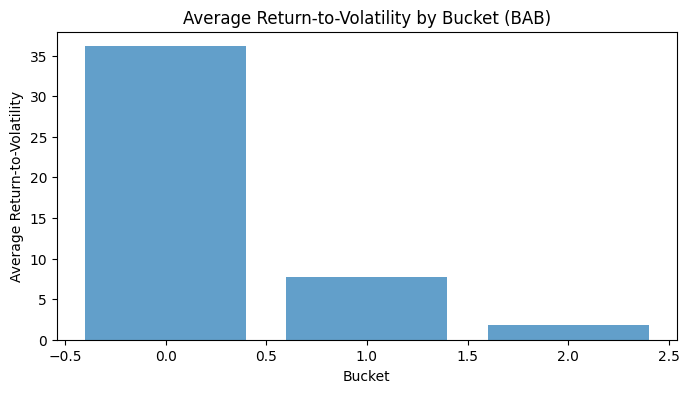

In [75]:
generate_bucket_charts(data, quantile_result_df, realized_variance_12m)

In [63]:
!pip3 install ace_tools

Defaulting to user installation because normal site-packages is not writeable


## Consideration on factor choice

The proposed factors were chosen by Moreira and Muir. They were chosen for solving volatility timing problem for each factor separately. In Uppal's paper the author uses 9 factors together. However, some of them might be too corelated. Hence, in pratice there is no reason to use them together

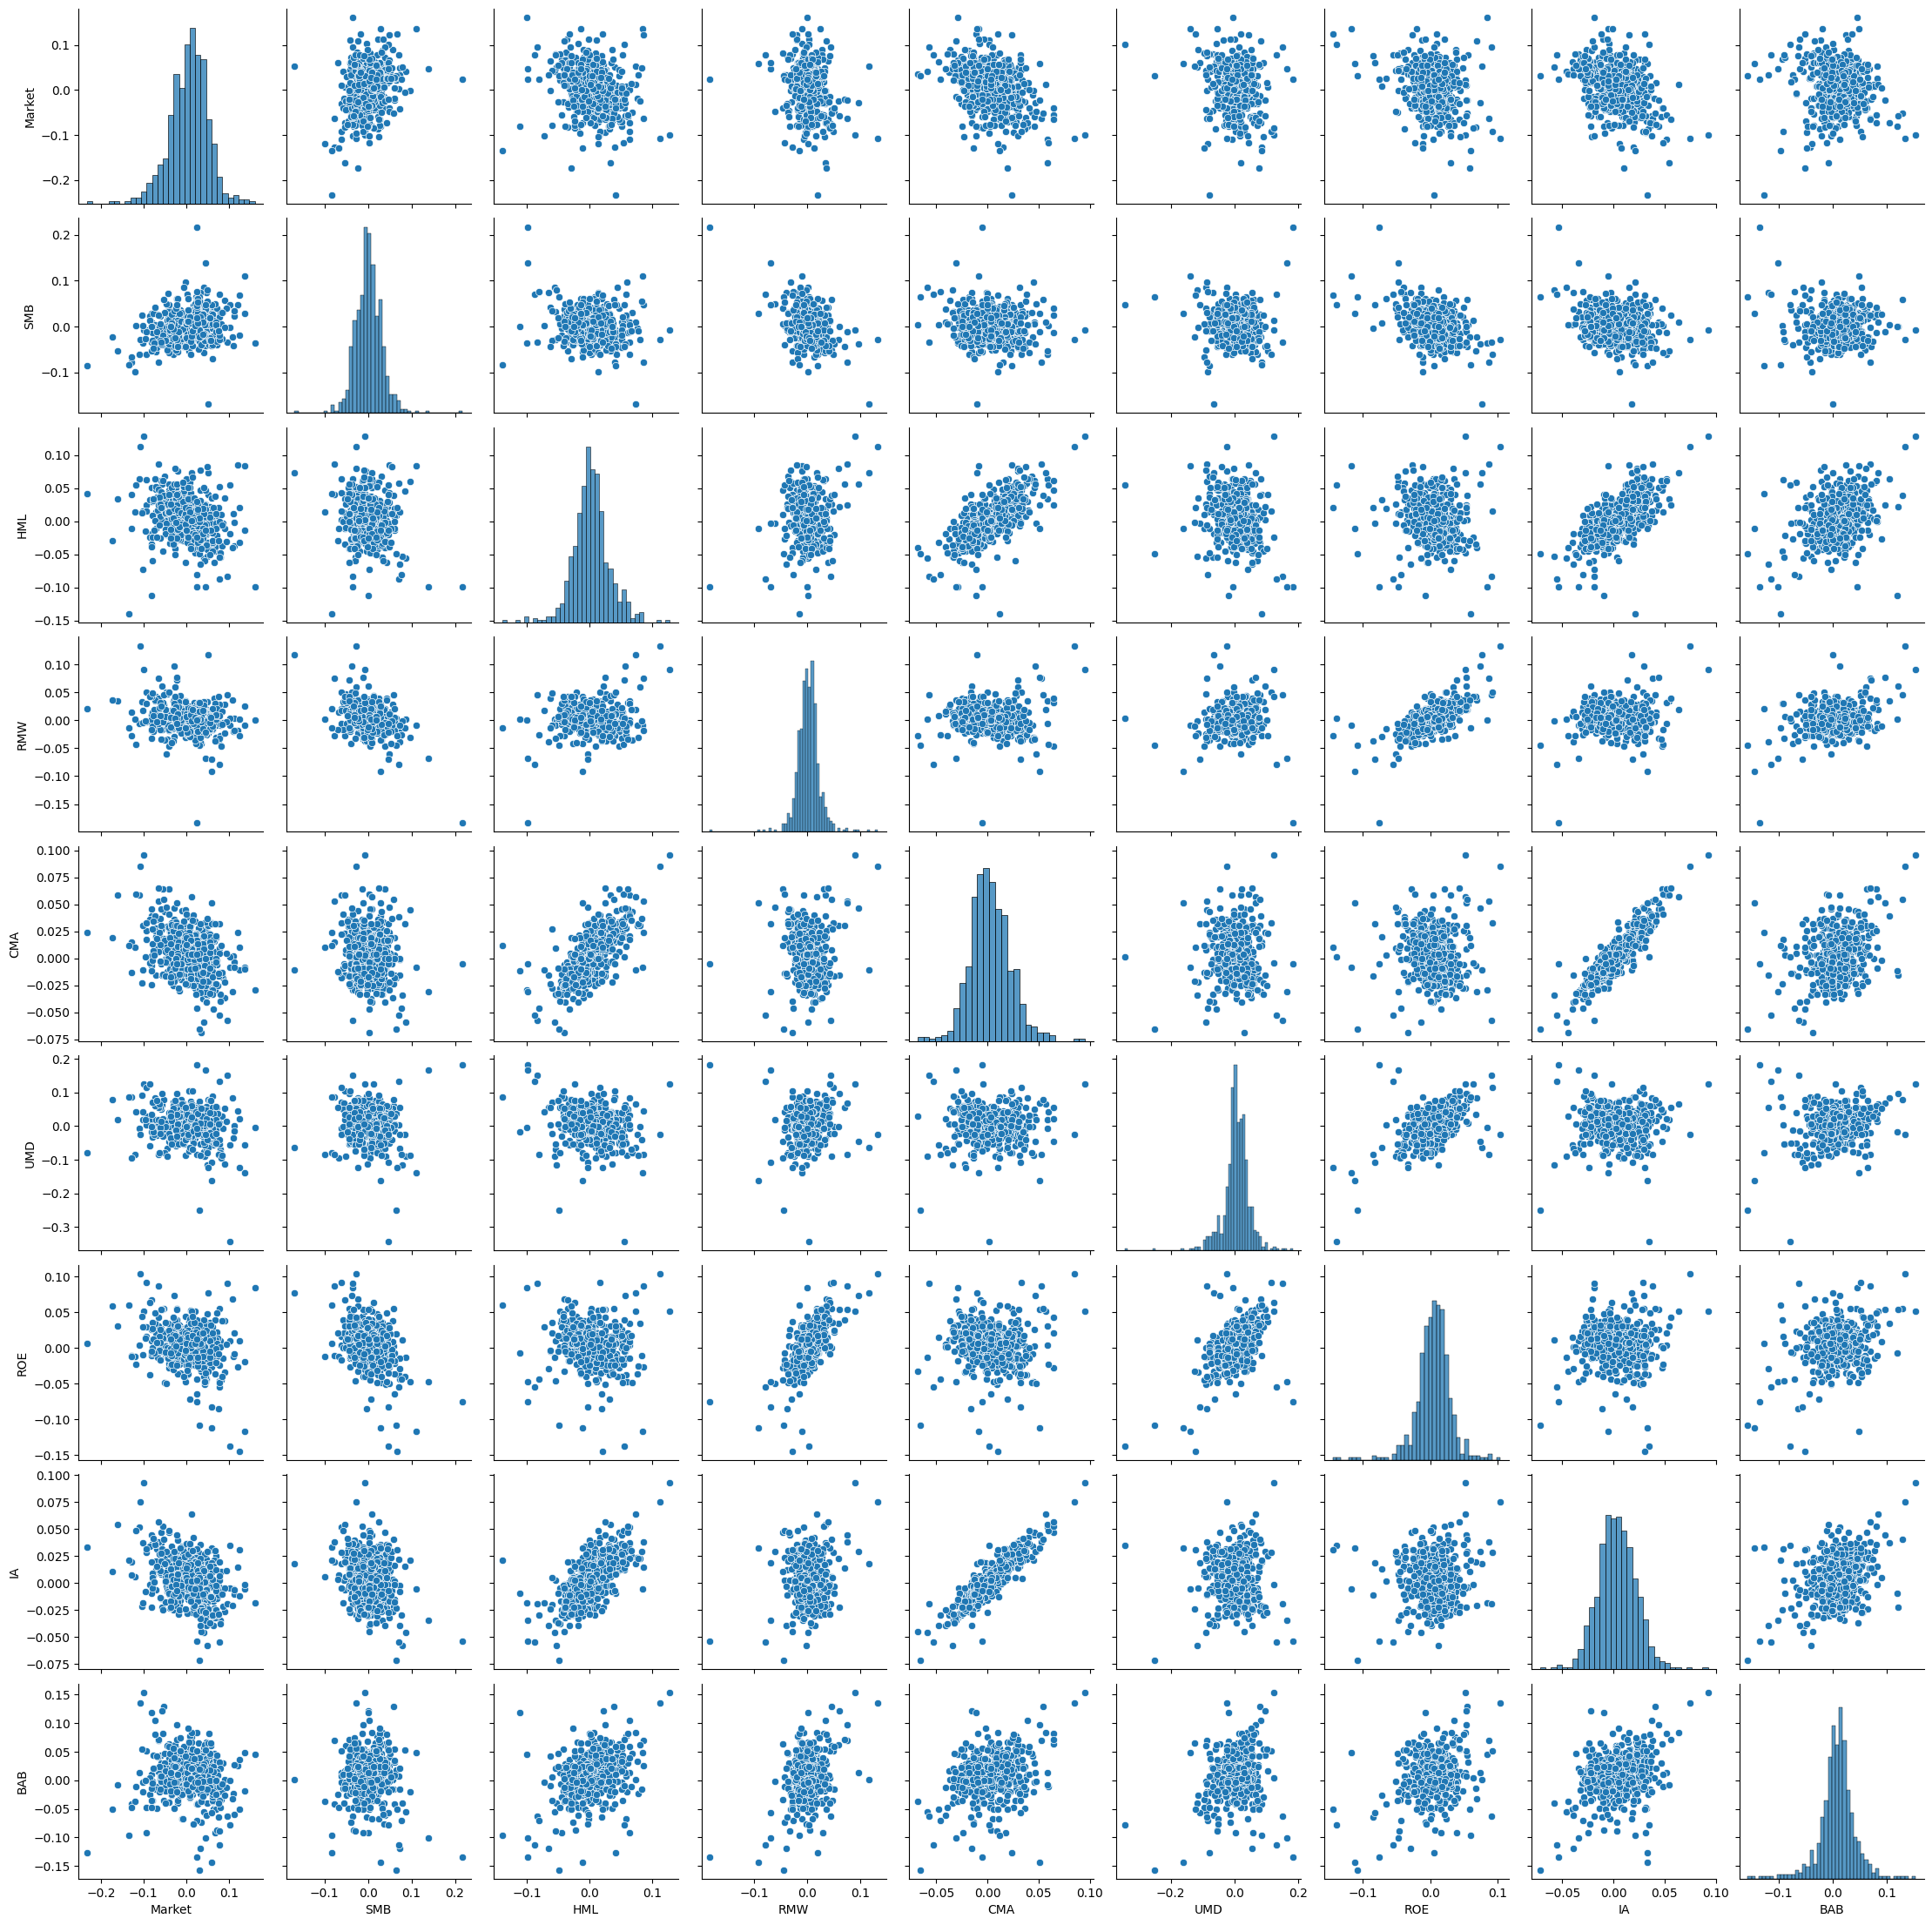

In [3]:
import seaborn as sns
sns.pairplot(data)

<Axes: >

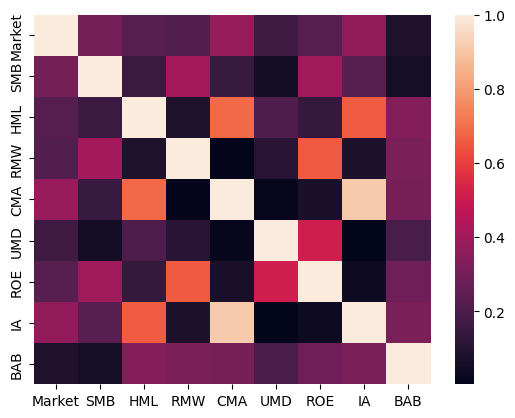

In [4]:
sns.heatmap(np.abs(data.corr()))

In [5]:
(np.abs(data.corr()).round(2)*100).astype(int)

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
Market,100,30,23,22,38,17,23,37,9
SMB,30,100,16,41,15,5,39,23,6
HML,23,16,100,8,69,21,14,66,33
RMW,22,41,8,100,1,11,65,8,31
CMA,38,15,69,1,100,2,7,91,31
UMD,17,5,21,11,2,100,51,0,20
ROE,23,39,14,65,7,51,100,3,28
IA,37,23,66,8,91,0,3,100,32
BAB,9,6,33,31,31,20,28,32,100


Inspection of the features suggests that **IA factor is highly correlated with CMA factor and with HML factor**. 

Moreover, CMA is correlated with HML

Finally, ROE is correlated with RMW.

Therefore, probably not all factors should be used in the model

### Further inspection of IA & CMA

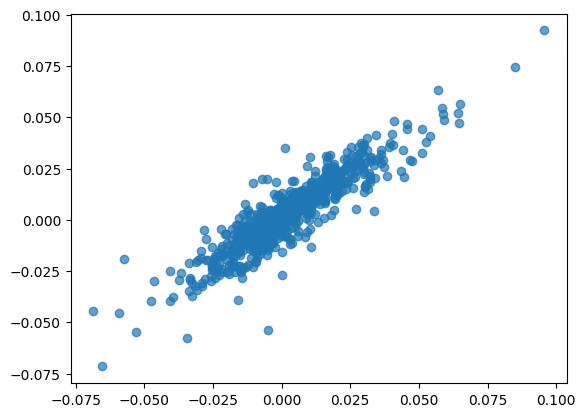

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data.loc[:,'CMA'],data.loc[:,'IA'], alpha = 0.7);

In [7]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = data['CMA']  # Independent variable
y = data['IA']   # Dependent variable

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)  # Adds the intercept term to the model

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
res = model.summary()

res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IA   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3148.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.48e-250
Time:                        17:35:52   Log-Likelihood:                 2225.0
No. Observations:                 647   AIC:                            -4446.
Df Residuals:                     645   BIC:                            -4437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.368      0.001       0.000       0.002
CMA            0.8570      0.015     56.108      0.000       0.827       0.887
==============================================================================
Omnibus:                       81.470   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.923
Skew:                          -0.423   Prob(JB):                     2.16e-90
Kurtosis:                       6.821   Cond. No.                         49.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Fix number of stocks that allowed to generate factors
N = 2000

I will solve the problem in more than one way.

To keep track of which approach is being discussed, it is useful to
have good notation. The notation I use is listed below.

#### Names of portfolio strategies
mv_pp_unc = mean-variance parametric-portfolio unconstrained\
mv_pp_con = mean-variance parametric-portfolio constrained
#### Weights of portfolio strategies
w_mv_pp_unc = weights of mean-variance parametric-portfolio unconstrained\
w_mv_pp_con = weights of mean-variance parametric-portfolio constrained
#### Returns of portfolio strategies
ret_mv_pp_unc = return of mean-variance parametric-portfolio unconstrained\
ret_mv_pp_con = return of mean-variance parametric-portfolio constrained
#### Sharpe ratios of portfolio strategies
sr_mv_pp_unc = Sharpe ratio of mean-variance parametric portfolio unconstrained\
sr_mv_pp_con = Sharpe ratio of mean-variance parametric portfolio constrained

## Q1.1

Explain
why one might expect these nine factors to be related to stock
returns. Write only a few sentences (2 or 3 sentences) for each factor.
(Feel free to use ChatGPT, but reading the original paper would be much
more educational.)

1. **Market (from Fama and French, 2015):**\
Market: Exposure to the market factor, measured by β, captures the systematic risk of an asset. Investors expect assets with higher betas to pay higher returns, which is consistent with the CAPM.

3. **SMB (Small Minus Big, from Fama and French, 2015):**\
The size effect is a phenomenon where smaller companies, as measured by market capitalization, tend to outperform larger companies. The reasons why smaller firms might exhibit higher returns are:
- Risk premium: Smaller companies are often considered riskier investments because they may be more vulnerable to economic downturns, have less diversified revenue streams, and may face greater challenges in accessing capital.
- Market inefficiencies: Smaller companies may be followed by fewer analysts and institutional investors, leading to less efficient pricing.
- Growth potential: Smaller companies may have more room for growth compared to their larger counterparts.


5. **HML (High Minus Low, from Fama and French, 2015):**\
High Minus Low (HML) is a value premium; it represents the spread in returns between companies with a high book-to-market value ratio and companies with a low book-to-market value ratio.
“Value” stocks with a high book-to-market ratio may have higher returns because of the following reasons:
- Market inefficiencies: Markets may not always efficiently price stocks, so value stocks are those that are underpriced.
- Investor behavior: During periods of market pessimism or economic downturns, investors may seek out value stocks that are perceived to be undervalued, leading to a potential premium for value stocks.
- Market sentiment: The value factor is often associated with companies that have solid fundamentals but are temporarily undervalued due to investor sentiment.
- Dividends and income: Value stocks often have higher dividend yields, providing investors with a potential income stream, which is valued in times of uncertainty or economic downturns.

6. **RMW (Robust Minus Weak, from Fama and French, 2015):**\
The robust-minus-weak profitability factor suggests that firms with higher operating profitability will have higher returns in the future. Also, during bad times, investors value firms with high profitability.

7. **CMA (Conservative Minus Aggressive, from Fama and French, 2015):**\
The conservative-minus-aggressive investment factor relates to the company’s internal investment.
- According to this factor, companies that invest aggressively in growth projects are likely to underperform in the future because aggressive firms may take on more risk, use higher leverage, and pursue more speculative investments.
- On the other hand, conservative firms may prioritize financial stability and have lower leverage.

8. **UMD (Up Minus Down, from Carhart, 1997):**\
The momentum factor is grounded in the belief that stocks that have recently performed well will continue to do so, and stocks that have recently performed poorly will continue to underperform. Some reasons why momentum factor may be related to stock returns are:
- Investor herding; i.e., when positive news is observed in a stock, investors may rush to buy, leading to further price appreciation. Similarly, when negative news is released, investors may sell, contributing to further price declines. This herding behavior can create self-reinforcing trends in stock prices.
- Information diffusion to new information may be slow. So, as new positive information is gradually disseminated and incorporated into stock prices, momentum can build.
- Underreaction by investors to positive news can lead to momentum because the stock’s price continues to adjust over time.
- Trend-following strategies can lead to momentum.

9. **ROE and IA (Profitability and Investment, from Hou, Xue, and Zhang, 2015):**\
- ROE is a factor from Hou, Xue, and Zhang (2015), and is the difference between the return on a portfolio of high profitability (return on equity, ROE) stocks and the return on a portfolio of low profitability stocks.
- IA is a factor from Hou, Xue, and Zhang (2015), and is the difference between the return on a portfolio of low investment stocks and the return on a portfolio of high investment stocks.

11. **BAB (Betting-Against-Beta, from Frazzini and Pedersen, 2014):**\
The BAB factor is based on the empirical observation that low-beta assets tend to earn higher risk-adjusted returns than predicted by traditional asset pricing models like the CAPM.
- One reason for this may be that low-beta assets, usually stable and less volatile stocks, are more liquid.
- Thus, investors seeking liquidity or stability may favor low-beta assets, contributing to their outperformance.


## Q1.2

Find the optimal θ vector (of dimension 9 × 1) for a mean-variance investor with risk aversion of γ = 5 if the investor can invest in only these nine factors. Use the entire dataset to estimate the nine factors’ mean and covariance of returns (i.e., you do not need to do out-of-sample analysis


1) One approach is to choose the portfolio weights without constraining the weight on the market to be equal to one.
1.1 This would be appropriate if you were an investor wanting to invest in the nine assets and wanted to find out what weight to assign to each of the nine assets.

2) Another approach is to view the market factor as the benchmark, and then to ask whether the investor can improve her portfolio by investing also in the other assets. That is:
2.1) Solve a portfolio choice problem with constraints, constraining the weight on the market, θmkt = 1, and optimize over the weights on the other eight factors.

We now choose the weights on the nine factors without constraining the weight on the market to equal one.

### 1st approach

In [9]:
# Preliminary step to import libraries and data is given earlier
# Function to find the mean-variance parametric-portfolio unconstrained weights
def mv_pp_unc(mu, Sigma, gamma):
    # compute the inverse of the var-cov matrix
    Sigmainv = np.linalg.inv(Sigma)
    # portfolio weights:
    w = (1/gamma) * Sigmainv @ mu
    return w

In [10]:
# Applying the function to find the mean-variance unconstrained weights
# Mean of factor returns
mu = data.mean()
# Variance-covariance matrix of factor returns
Sigma = data.cov()
# Define gamma
gamma = 5
# Compute the parametric portfolio weights unconstrained
w_mv_pp_unc = mv_pp_unc(mu,Sigma,gamma)
# Put the weights in a dataframe
w_mv_pp_unc = pd.Series(w_mv_pp_unc, index=data.columns)
w_mv_pp_unc_df = pd.DataFrame({"w_mv_pp_unc": w_mv_pp_unc})
w_mv_pp_unc_df

,w_mv_pp_unc
Market,1.1062
SMB,0.9558
HML,-0.1550
RMW,0.2070
CMA,0.1534
UMD,0.2162
ROE,1.7734
IA,2.7261
BAB,0.7783


### 2 approach

In [11]:
# In the code below, we constrain the weight on the market factor to
#equal 1, while all the other weights are unconstrained

def mv_pp_con(n, mu, Sigma, gam):
    A = np.ones((n))
    b=1
    lb = np.append(1,np.repeat(-9999,n-1))
    ub = np.append(1,np.repeat(9999,n-1))
    H = gam * Sigma
    objective = lambda x: 0.5 * x.T.dot(H).dot(x) - mu.T.dot(x)
    result = minimize(objective, x0=np.ones(n) / n, bounds=list(zip(lb, ub)))
    return result.x

In [12]:
# Use the minimization function to solve the constrained optimization problem
# number of factors
n = data.shape[1]
# convert mu into an np object
mu = np.array(mu)
w_mv_pp_con = mv_pp_con(n,mu,Sigma,gamma)
# Put the weights in a dataframe, along with the unconstrained weights
w_mv_pp_con = pd.Series(w_mv_pp_con, index=data.columns)
w_mv_pp_con_df = pd.DataFrame({"w_mv_pp_unc": w_mv_pp_unc,"w_mv_pp_con":
w_mv_pp_con})
w_mv_pp_con_df

,w_mv_pp_unc,w_mv_pp_con
Market,1.1062,1.0000
SMB,0.9558,0.9810
HML,-0.1550,-0.1546
RMW,0.2070,0.1783
CMA,0.1534,0.0351
UMD,0.2162,0.2011
ROE,1.7734,1.7560
IA,2.7261,2.7487
BAB,0.7783,0.7981


From the above, we see that
- in the unconstrained solution, the weight on the market factor is
close to one (it is 1.1062)
- thus, when we constrain the weight on the market to be exactly one, the other weights do not change much (except the weight for CMA).

## Q1.3 

Find the Sharpe ratio for each of the nine individual factors and compare it to the Sharpe ratio of the parametric portfolio you have identified in the previous question

In [13]:
# Define a function to compute annualized Sharpe ratio
def SharpeRatio(ret,rf = 0):
    Mu = np.mean(ret-rf) * 12
    std = ret.std() * np.sqrt(12)
    return Mu, std, Mu/std        # note this function returns three quantities

# Set up a dataframe for reporting the Sharpe ratios
sr_factors = pd.DataFrame(index=data.columns,
                              columns=['E[R]', 'Volatility', 'SR'])

In [14]:
# Compute the Sharpe ratio for each factor (which is in columns)
for k in data.columns:
    ret_k = data[k]
    Mu, std, sharpe = SharpeRatio(ret_k, rf=0)
    sr_factors.loc[k] = [Mu, std, sharpe]
    
# Compute the Sharpe ratio of the unconstrained parametric portfolio
ret_mv_pp_unc = data @ w_mv_pp_unc
sr_mv_pp_unc = SharpeRatio(ret_mv_pp_unc)

# Compute the Sharpe ratio of the constrained parametric portfolio
ret_mv_pp_con = data @ w_mv_pp_con
sr_mv_pp_con = SharpeRatio(ret_mv_pp_con)

In [15]:
# To compare the Sharpe ratios, add to list of sr_factors
sr_factors.loc[len(sr_factors)] = sr_mv_pp_unc
sr_factors.loc[len(sr_factors)] = sr_mv_pp_con
sr_factors = sr_factors.rename(index={9: 'sr_mv_pp_unc'})
sr_factors = sr_factors.rename(index={10: 'sr_mv_pp_con'})
sr_factors

,E[R],Volatility,SR
Market,0.0684,0.1579,0.4329
SMB,0.0212,0.1070,0.1979
HML,0.0283,0.1017,0.2779
RMW,0.0320,0.0761,0.4207
CMA,0.0332,0.0694,0.4779
UMD,0.0754,0.1486,0.5073
ROE,0.0608,0.0888,0.6843
IA,0.0409,0.0653,0.6264
BAB,0.1047,0.1164,0.8996
sr_mv_pp_unc,0.4203,0.2899,1.4497


From the table above that reports the Sharpe ratios:
- We see that the Sharpe ratio for the market factor is 0.4329;
- Several other factors, have even higher Sharpe ratios;
- But, the Sharpe ratios of both the unconstrained and constrained parametric portfolios are even higher, about 1.44 per year.

## Q1.4
Find the optimal portfolio weights for each of the Nt = 2000 assets that are used to form each of the nine factors.


Since we do not have the weights of the individual assets within each factor, we cannot compute the exact weights for each of the 2000 assets numerically. However, we can express the optimal asset weights symbolically in terms of the factor weights and the (unknown) asset weights within each factor.

### Explanation of Asset Weights in the Optimal Portfolio 

Let $w_{ij}$ be the weight of asset $i$ in factor $j$'s portfolio.

The overall weight of asset $i$ in the optimal portfolio determined at time t is expressed as:

$$
w_{i} = \sum_{j=1}^9 \left( \theta_{j} \cdot w_{ij} \right)
$$

Where:
- $w_{i}$: The weight of asset $i$ in the overall portfolio at time t.
- $N_{t}$: The number of firms at time t.
- $\theta_{j}$: The optimal weight of factor $j$ in the portfolio at time t (calculated in Q1.2).
- $w_{ij}$: The weight of asset $i$ in factor $j$'s portfolio at time t (unknown).


### Notes:
- This equation shows that the weight of each asset $w_i$ is a linear combination of the factor weights ($w_j$) and the asset's contribution to each factor ($w_{ij}$).
- Since the values of $w_{ij}$ are not provided, the exact numerical values of $w_i$ cannot be calculated.


In [16]:
'''
# Number of assets
N = 2000

# Create a DataFrame to hold the symbolic weights
asset_weights = pd.DataFrame({'Asset': np.arange(1, N+1)})

# For each factor, add a column with the symbolic expression of the asset's weight contribution
for factor in excess_factor_returns.columns:
    asset_weights[factor] = f'w_{factor}_i'  # Placeholder for the asset's weight in factor j

# Now, compute the symbolic overall weight for each asset
asset_weights['Optimal Weight'] = ''

for i in range(N):
    weight_expression = ''
    for factor in excess_factor_returns.columns:
        # Append the term (w_j * w_{ij}) to the expression
        weight_expression += f' + ({optimal_factor_weights[factor]:.4f}) * w_{{{factor},{i+1}}}'
    # Remove the leading ' + ' and assign to the 'Optimal Weight' column
    asset_weights.at[i, 'Optimal Weight'] = weight_expression[3:]
''';

## Q2.0

In [17]:
# Import the libraries we need
import numpy as np
import pandas as pd
# To format numbers in pandas dataframes set up format for entire file
pd.options.display.float_format = '{:,.4f}'.format
# Import the data we will use
data = pd.read_excel("data/QPM-FactorsData-ForAssignment-04.xlsx", header=0, index_col=0)
data.index = pd.to_datetime(data.index, format='%Y%m')

In [18]:
# Unconditional Sharpe ratio (i.e., without conditioning on volatility)
start_date = pd.to_datetime('1977-02-01')
SR_uncon = data.loc[data.index >= start_date, :].mean() / data.loc[data.
     index >= start_date, :].std() * np.sqrt(12)
# Put the results in a dataframe
summary = pd.DataFrame({"SR_unconditional":SR_uncon})
summary = summary.T
summary

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
SR_unconditional,0.5305,0.2078,0.1696,0.5055,0.3985,0.4740,0.7224,0.5080,0.8796


## Q2.1
Please use mean-variance optimization to combine The original (without timing) factor, The volatility-managed version of this factor

In [19]:
# We denote ‘realized variance‘ for the market return as ‘RV‘
# Note that here we are using realized variance based on monthly returns
# In the original papers, it was realized variance based on DAILY returns
RV = data.rolling(12,closed = "left").var()
# Calculate the constant
c = 1/(1/RV).mean()
# Calculate weights for the risky assets (factors)
weight_is = c/RV # in-sample volatility multiplier
# Calculate return of the strategy
r_str_is = weight_is*data

## Q2.2

Compare
the Sharpe ratios of the portfolio with just the original factor and the portfolio that includes the volatility-timed factor

In [20]:
# Create an empty dataframe
combine_r_is = pd.DataFrame()
# Combine optimally each factor with its volatility-timed counterpart
for i in r_str_is.columns:
    gamma = 5
    combine_df = pd.merge(data.loc[data.index >= start_date, :][i], r_str_is[i],left_index=True,right_index=True)
    mu_df = combine_df.mean()
    combine_V = combine_df.cov()
    
    w_df = (1/gamma) * (mu_df @ np.linalg.inv(combine_V))
    combine_r_is[i] = w_df[0] * data.loc[data.index >= start_date, :][i] + w_df[1] * r_str_is.loc[r_str_is.index >= start_date, :][i]
    
    # Calculate in-sample Sharpe ratio
    SR_combine_is = combine_r_is.mean()/combine_r_is.std() * np.sqrt(12)

In [22]:
summary = pd.DataFrame({"SR_unconditional":SR_uncon,"SR_combined_in_sample":SR_combine_is})
summary = summary.T
summary

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
SR_unconditional,0.5305,0.2078,0.1696,0.5055,0.3985,0.4740,0.7224,0.5080,0.8796
SR_combined_in_sample,0.5560,0.2103,0.1771,0.5984,0.4019,0.7513,1.0811,0.5207,1.0337


Separate each factor and its voaltility-managed counterpart into 9 portfolios.

 From the table above, reproduced from the previous page, we see that volatility timing has the potential to improve the Sharpe ratio;
- for many of the factors, the combined portfolio of the unconditional and conditional factors, has a higher Sharpe ratio than the unconditional factor (HML, RMW, CMA, UMD, ROE, IA, and BAB).
- Performance can be further improved by conditioning not on monthly realized volatility for the last 12 months (as we have done here), but by conditioning on daily realized volatility for the last month.

## Q2.4 

List the limitations
of the strategy of timing factors conditional on their
volatilities. Could one implement this volatility-timing policy in practice?

There are several limitations of the analysis presented above:
1. Conditioning on monthly instead of daily realized volatility is not
good;
2. The entire exercise is done in-sample; that is, the choice of c suffers from look-ahead bias
3. The entire exercise ignores transaction costs.
4. Similarly, there is look-ahead bias when choosing the weights in the “combined” strategy, because the moments of asset returns are computed using all of the data, not just historical data.

out-of-sample

In [23]:
combine_r_oos = pd.DataFrame()
for i in data.index[120:]: #start from the 120th month 
    
    start_month = i - pd.DateOffset(months = 120) 
    end_month = i - pd.DateOffset(months = 1)
    Ret_df = data.loc[start_month:end_month] #rolling original return 
    r_str_df = r_str_is.loc[start_month:end_month] # rolling vol-strategy return
    
    for j in Ret_df.columns: 
        gamma = 5
        combine_df = pd.merge(Ret_df[j], r_str_df[j], left_index = True, right_index = True)
        combine_V = combine_df.cov()
        mu_df = combine_df.mean()
        w_df = (1/gamma) * (mu_df @ np.linalg.inv(combine_V)) 
        combine_r_oos.loc[i,j] = w_df[0] * data.loc[i,j] + w_df[1] * r_str_is.loc[i,j]
SR_OOS = combine_r_oos.mean()/combine_r_oos.std() * np.sqrt(12)

In [24]:
summary = pd.DataFrame({"SR\_unconditional":SR_uncon,
                        "SR\_combined\_in\_sample":SR_combine_is,
"SR\_combined\_out\_of\_sample":SR_OOS})
summary = summary.T
summary.round(3)

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
SR\_unconditional,0.5300,0.2080,0.1700,0.5060,0.3990,0.4740,0.7220,0.5080,0.8800
SR\_combined\_in\_sample,0.5560,0.2100,0.1770,0.5980,0.4020,0.7510,1.0810,0.5210,1.0340
SR\_combined\_out\_of\_sample,0.3860,-0.1770,0.5530,0.2450,0.2210,0.6130,0.9660,0.5460,0.7340


- Other than for HML, Sharpe ratio is much poorer out of sample compared to that for the combined strategy in sample.
- Performance will be even weaker after we net transaction costs.